In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib.ticker import FixedLocator

In [36]:
ds = pd.read_csv("/Users/arinafedotova/archive/Cleaned_ships_data.csv")

In [37]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  200 non-null    object
 1   ship_name     200 non-null    object
 2   built_year    200 non-null    int64 
 3   gt            200 non-null    int64 
 4   dwt           200 non-null    int64 
 5   length        200 non-null    int64 
 6   width         200 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.1+ KB
None


In [38]:
print(ds.keys())

Index(['Company_Name', 'ship_name', 'built_year', 'gt', 'dwt', 'length',
       'width'],
      dtype='object')


In [39]:
# Получение словаря {длина : средняя загруженность корабля с этой длиной}
ds_length_dwt = dict()
for i in set(ds.get('length')):
    ds_length_dwt[i] = 0
    count = 0
    for j in range(len(ds)):
        if ds.loc[j][5] == i:
            ds_length_dwt[i] += ds.loc[j][4]
            count += 1
    ds_length_dwt[i] /= count
ds_length_dwt = dict(sorted(ds_length_dwt.items()))
print(ds_length_dwt)

{272: 8200.0, 277: 82960.0, 280: 74894.0, 282: 175775.0, 284: 75008.5, 286: 82058.0, 288: 81958.5, 289: 122865.33333333333, 290: 104177.9, 291: 87760.0, 292: 179429.875, 293: 62839.0, 294: 91907.5, 295: 127037.625, 296: 55738.0, 297: 95131.0, 298: 87130.0, 299: 102969.5, 300: 174372.53846153847, 306: 13991.0, 311: 9616.0, 315: 114418.5, 316: 12200.0, 323: 19209.0, 324: 265278.0, 325: 250379.0, 327: 297088.0, 328: 115036.0, 330: 290719.3333333333, 331: 306474.0, 332: 268700.3333333333, 333: 303079.25, 334: 178782.66666666666, 335: 94131.125, 336: 309304.0, 337: 64152.0, 338: 184538.0, 339: 310961.0, 340: 239600.0, 344: 260349.0, 345: 154940.0, 347: 110387.0, 349: 122961.0, 350: 119827.0, 351: 107492.0, 353: 178257.0, 360: 400694.0, 362: 398997.0, 366: 151866.0, 367: 142023.0, 368: 145502.0, 369: 153594.0, 399: 207765.75, 400: 207790.5, 489: 394330.0}


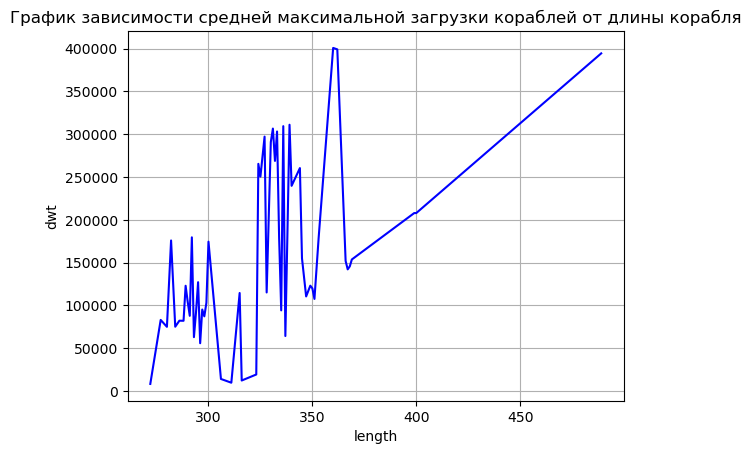

In [40]:
# построение График зависимости средней максимальной загрузки кораблей от длины корабля
x = list(ds_length_dwt.keys())
y = list(ds_length_dwt.values())
y_interp = scipy.interpolate
plt.plot(x, y, color='blue') 
plt.title('График зависимости средней максимальной загрузки кораблей от длины корабля') 
plt.xlabel('length') 
plt.ylabel('dwt') 
plt.grid()  
plt.show()  

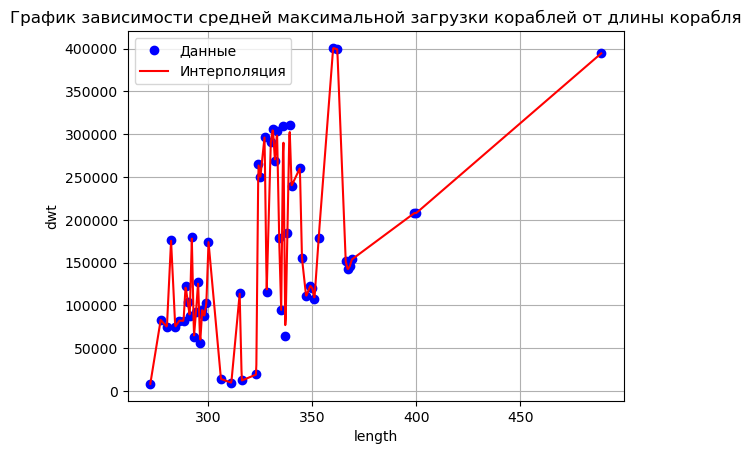

In [125]:
x = list(ds_length_dwt.keys())
y = list(ds_length_dwt.values())

# Создайте объект interp1d
f = scipy.interpolate.interp1d(x, y, kind='linear', fill_value='extrapolate')

# Создайте новые точки для интерполяции
xnew = np.linspace(min(x), max(x), num=1000)

# Оценка интерполированных значений в новых точках
ynew = f(xnew)

# Постройте график
plt.plot(x, y, 'o', color='blue', label='Данные')
plt.plot(xnew, ynew, '-', color='red', label='Интерполяция')
plt.title('График зависимости средней максимальной загрузки кораблей от длины корабля')
plt.xlabel('length')
plt.ylabel('dwt')
plt.legend(loc='best')
plt.grid()
plt.show()

In [41]:
# Распределение количества кораблей по их типу
ds_name_count = dict()
for i in set(ds.get('ship_name')):
    ds_name_count[i] = 0
    for j in range(len(ds)):
        if ds.loc[j][1] == i:
            ds_name_count[i] += 1
ds_name_count = dict(sorted(ds_name_count.items(), key = lambda item: item[1]))

median = sum(ds_name_count.values())/len(ds_name_count)
count = 0
while min(ds_name_count.values()) < median:
    count += list(ds_name_count.values())[0]
    del ds_name_count[list(ds_name_count.keys())[0]]
if count:
    ds_name_count["Other"] = count
    
print(ds_name_count)

{'LNG Tanker': 31, 'Crude Oil Tanker': 36, 'Container Ship': 51, 'Bulk Carrier': 68, 'Other': 14}


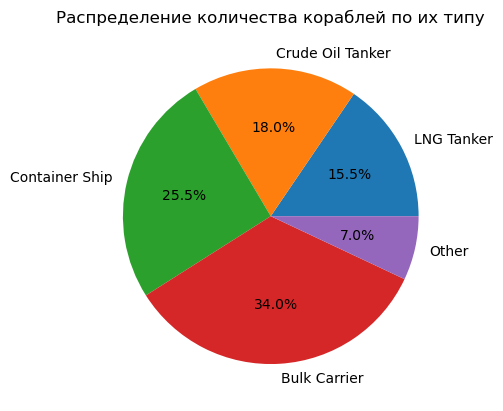

In [42]:
names = list(ds_name_count.keys())
count = list(ds_name_count.values())
plt.pie(count, labels = names, autopct='%1.1f%%') 
plt.title('Распределение количества кораблей по их типу') 
plt.show() 

In [43]:
# Гистограмма распределения количества кораблей по годам постройки
ds_year_count = dict()
for i in set(ds.get('built_year')):
    ds_year_count[i] = 0
    for j in range(len(ds)):
        if ds.loc[j][2] == i:
            ds_year_count[i] += 1
ds_year_count = dict(sorted(ds_year_count.items()))
print(ds_year_count)
print(len(ds_year_count))

{1976: 1, 1990: 1, 1992: 1, 1993: 2, 1994: 1, 1995: 2, 1996: 2, 1997: 2, 1999: 3, 2000: 1, 2001: 1, 2002: 2, 2003: 5, 2004: 5, 2005: 3, 2006: 2, 2007: 4, 2008: 8, 2009: 8, 2010: 14, 2011: 21, 2012: 15, 2013: 8, 2014: 14, 2015: 12, 2016: 14, 2017: 7, 2018: 9, 2019: 12, 2020: 5, 2021: 6, 2022: 7, 2023: 2}
33


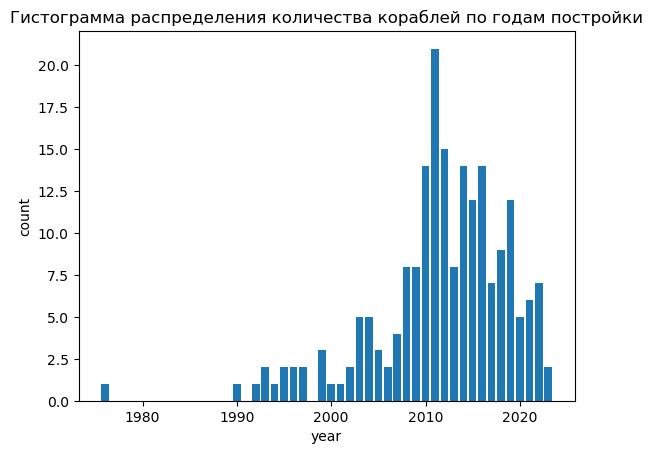

In [44]:
plt.bar(ds_year_count.keys(), ds_year_count.values())
plt.xlabel('year')
plt.ylabel('count')
plt.title('Гистограмма распределения количества кораблей по годам постройки') 
plt.show() 

In [50]:
#Гистограмма распределения количества кораблей по годам постройки (built_year) и максимальному весу груза (dwt)
dwt_bins = 20
dwt_min = ds['dwt'].min()
dwt_max = ds['dwt'].max()
dwt_step = (dwt_max - dwt_min) / dwt_bins

ds_year = sorted(list(set(ds.get('built_year'))))

# Новый столбец с интервалами
ds['dwt_bins'] = pd.cut(ds['dwt'], bins=pd.interval_range(start=dwt_min, end=dwt_max, periods=dwt_bins))
print(ds[['dwt','dwt_bins']])
# 'built_year' и 'dwt_bins' - столбцы, а элементы таблицы - количество судов в каждом бине 'dwt' для каждого года постройки
grouped_data = ds.groupby(['built_year', 'dwt_bins']).size().unstack(fill_value=0)
print(ds[['dwt', 'built_year', 'dwt_bins']])
# Сохранение полученных значений в список ds_count_dwt
ds_count_dwt = grouped_data.reindex(ds_year, fill_value=[0]*20).values.tolist()

print(ds_count_dwt)

        dwt                        dwt_bins
0    394330            (381054.3, 400694.0]
1    240000  (223936.7, 243576.40000000002]
2    228149  (223936.7, 243576.40000000002]
3    228111  (223936.7, 243576.40000000002]
4    198937  (184657.30000000002, 204297.0]
..      ...                             ...
195  180242  (165017.6, 184657.30000000002]
196  179719  (165017.6, 184657.30000000002]
197  179719  (165017.6, 184657.30000000002]
198  180310  (165017.6, 184657.30000000002]
199  176283  (165017.6, 184657.30000000002]

[200 rows x 2 columns]
        dwt  built_year                        dwt_bins
0    394330        2017            (381054.3, 400694.0]
1    240000        2023  (223936.7, 243576.40000000002]
2    228149        2019  (223936.7, 243576.40000000002]
3    228111        2019  (223936.7, 243576.40000000002]
4    198937        2019  (184657.30000000002, 204297.0]
..      ...         ...                             ...
195  180242        2010  (165017.6, 184657.30000000002]


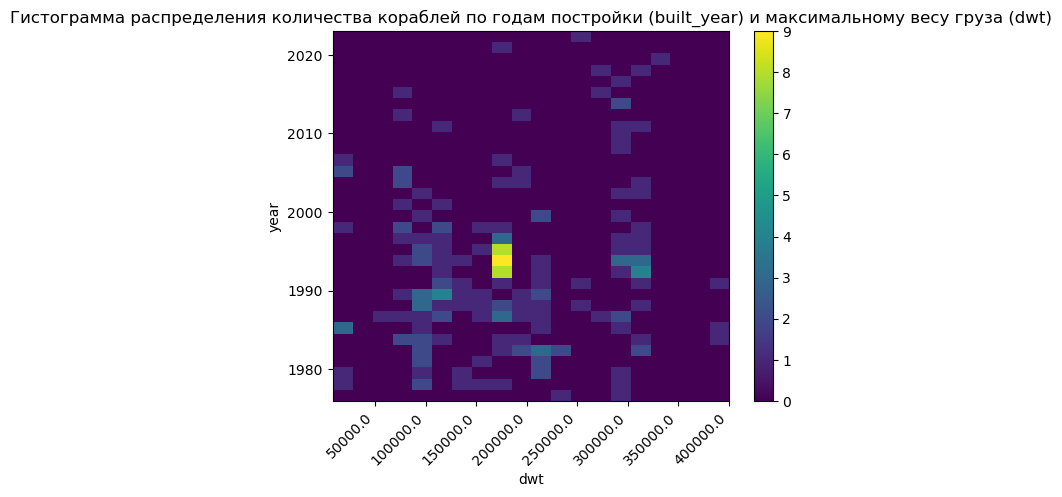

In [51]:
fig, ax = plt.subplots()
im = ax.imshow(ds_count_dwt, aspect='auto', extent=[dwt_min, dwt_max, min(ds_year), max(ds_year)])
plt.colorbar(im)
ax.xaxis.set_major_locator(plt.FixedLocator(ax.get_xticks()))
ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')

plt.xlabel('dwt')
plt.ylabel('year')
plt.title('Гистограмма распределения количества кораблей по годам постройки (built_year) и максимальному весу груза (dwt)') 
plt.show() 

In [ ]:
import seaborn as sns
ds_iris = pd.read_csv("IRIS.csv")
ds_iris

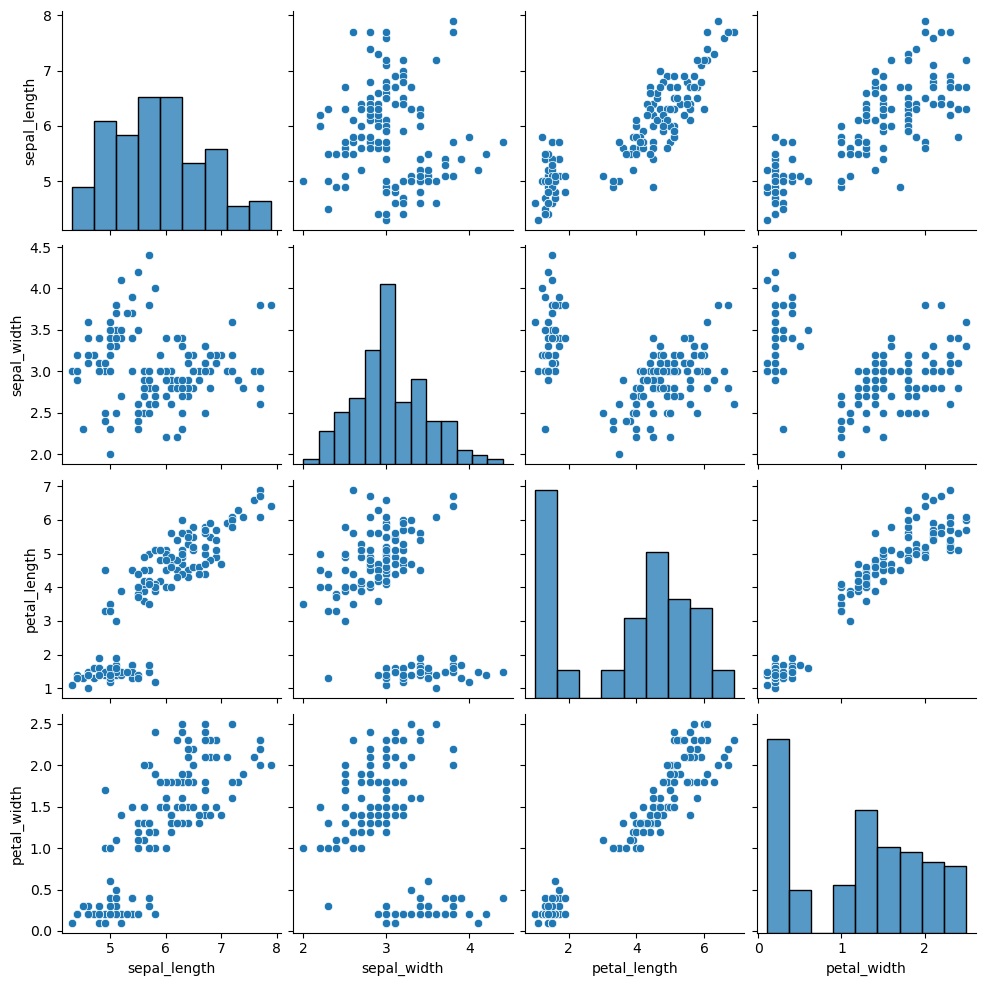

In [52]:
sns.pairplot(ds_iris)

In [ ]:
headers = list(ds_iris.columns.values)

plt.figure(figsize=(15, 13))

for i in range(len(headers)-1):
    plt.subplot(2,2,i+1)
    plt.title(headers[i])
    sns.violinplot(x = 'species', y = headers[i], data = ds_iris)
plt.show()

In [ ]:
# ЗАДАНИЕ 2

In [53]:
ds_heart = pd.read_csv("heart.csv")
ds_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [55]:
ds_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [80]:
ds_heart.describe(include = ['object']) 

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [59]:
ds_heart.groupby(by = 'Sex')['HeartDisease'].count()

Sex
F    193
M    725
Name: HeartDisease, dtype: int64

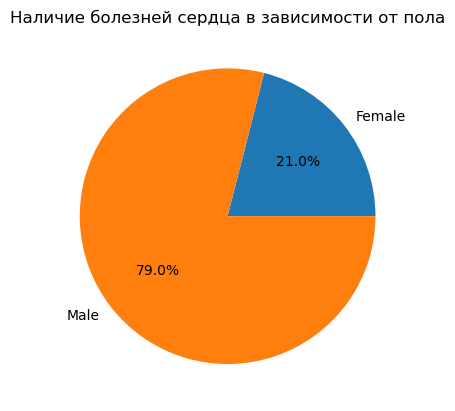

In [61]:
plt.pie(ds_heart.groupby(by = 'Sex')['HeartDisease'].count(), labels = ["Female", "Male"], autopct='%1.1f%%') 
plt.title('Наличие болезней сердца в зависимости от пола') 
plt.show()

In [ ]:
plt.title()
plt.bar()
plt.show()

In [62]:
ds_heart.ChestPainType.value_counts(dropna = False)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
['ASY', 'NAP', 'ATA', 'TA']


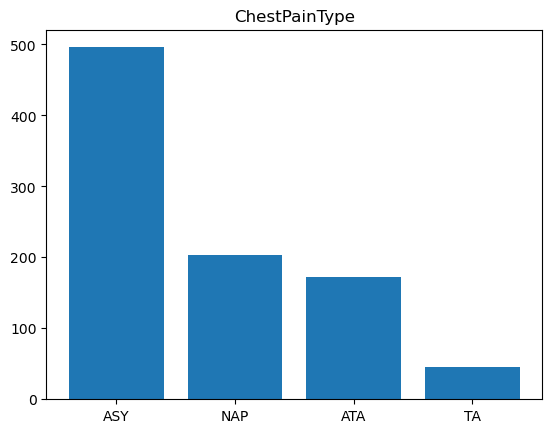

In [78]:
ds_chest_pain_type = ds_heart.ChestPainType.value_counts(dropna = False)
print(ds_chest_pain_type)
print(ds_chest_pain_type.index.tolist())
plt.title('ChestPainType')
plt.bar(ds_chest_pain_type.index.tolist(), ds_chest_pain_type.tolist())
plt.show()

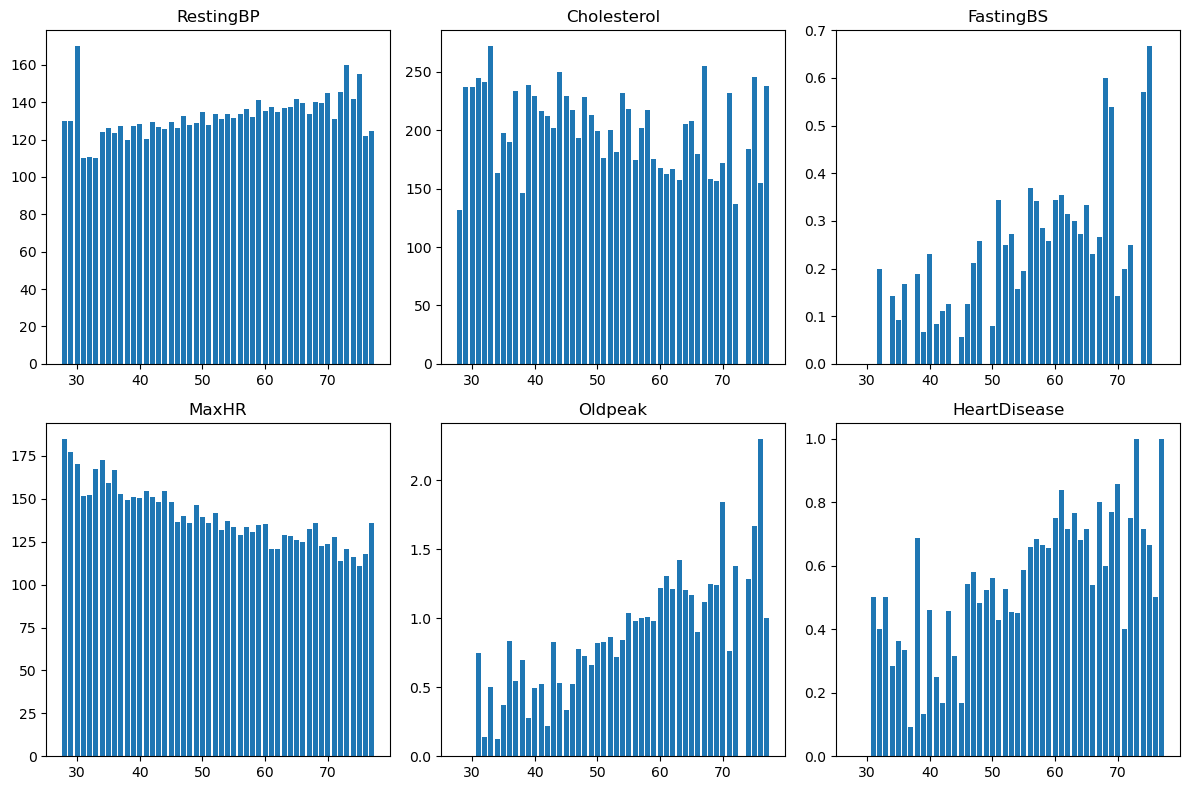

In [96]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
rows, cols = 2, 3

num_cols=['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
counter = 0

for row in range(rows):
    for col in range(cols):
        mean_by_age = ds_heart.groupby(by = 'Age')[num_cols[counter]].mean()
        axs[row, col].bar(mean_by_age.index.tolist(), mean_by_age.tolist())
        axs[row, col].set_title(num_cols[counter])
        counter+=1
        
fig.tight_layout()
plt.show()

In [103]:
ds_heart.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


FastingBS
0    704
1    214
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
HeartDisease
1    508
0    410
Name: count, dtype: int64


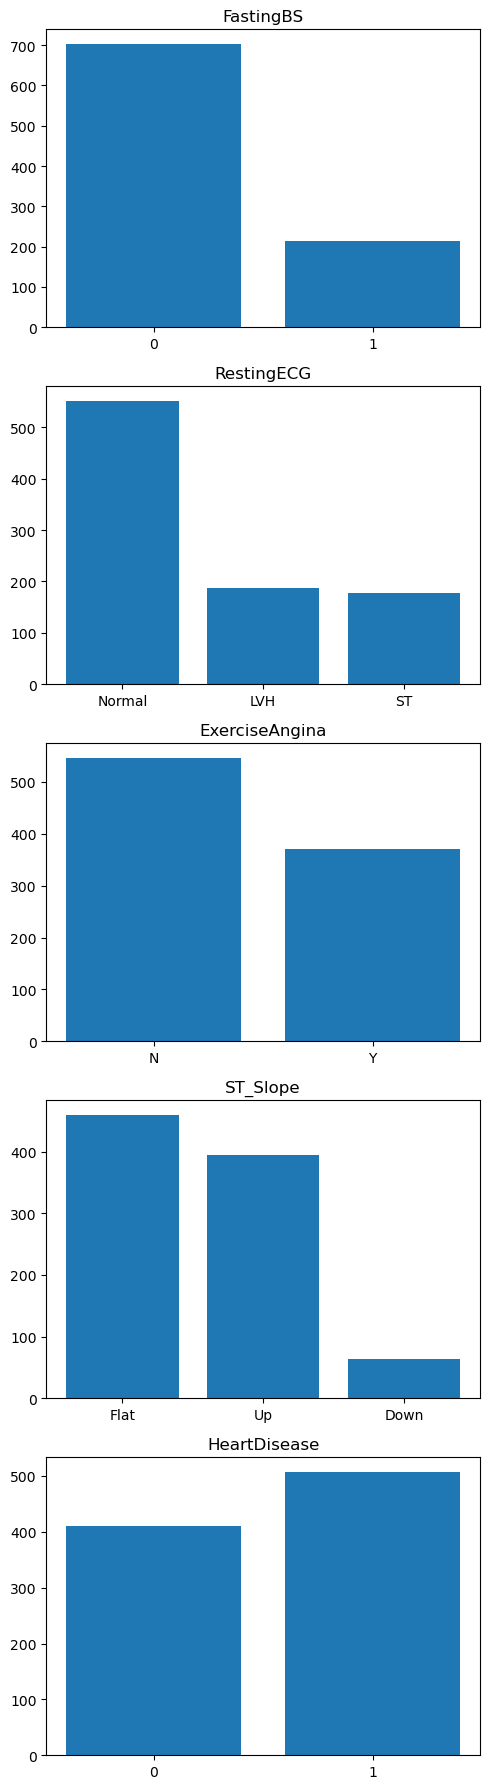

In [122]:
fig, axs = plt.subplots(5, 1, figsize=(5, 18))
rows = 5

categorical_features = ['FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
counter = 0

for row in range(rows):
    if counter == len(categorical_features):
        break
    count_category = ds_heart[categorical_features[counter]].value_counts(dropna = False)
    axs[row].set_xlabel('Столбцы')
    axs[row].set_ylabel('Значения')
    axs[row].bar(count_category.index.tolist(), count_category.tolist())
    axs[row].set_xticks(count_category.index.tolist())
    
    axs[row].set_title(categorical_features[counter])
    counter+=1
        
fig.tight_layout()
plt.show()


In [ ]:
categorical_features = ['FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data = ds_heart, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()

In [ ]:
sns.pairplot(ds_heart, hue="Sex")